<a href="https://colab.research.google.com/github/ran4erep/Stable-Colab/blob/main/Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение к Google Drive:


---

Если не хотите сохранять все сгенерированные изображения в Google Диск, то значение переменной **use_gdrive** в блоке **"Запуск и работа Stable Diffusion"** должно быть **False**, а этот блок запускать не нужно.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Установка Stable Diffusion и его зависимостей:

In [ ]:
!pip install diffusers["torch"] transformers
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers

# Работа Stable Diffusion:

В переменной **current_checkpoint** указываем чекпоинт модель с HuggingFace,  взять её можно на [CivitAI](https://civitai.com/models). При поиске моделей, в фильтре, ставим галочку только на checkpoint.

Потом уже заходим на [HuggingFace](https://huggingface.co/models?library=diffusers) и ищем там понравившеюся модель по её названию с CivitAI. Копируем это название и вставляем в значение переменной **current_checkpoint**.

Есть [калькулятор разрешений](https://wtools.io/ru/aspect-ratio-calculator), для того чтобы подобрать цифры пропорциональные нужному соотношению сторон.

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


scheduler/scheduler_config.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


###############
Текущая модель Stable Diffusion: GraydientPlatformAPI/picx-real
Промпт: naked woman armed with a revolver, 25 years old, ginger hair, black skirt, shocked expression, empty hospital hallway, eerie atmosphere, 8k, ultra realistic, highly detailed, cinematic lighting
Негативный промпт: ugly face, canvas frame, cartoon, 3d, disfigured, bad art, deformed, extra limbs, close up, b&w, wierd colors, blurry, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, ugly, blurry, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, out of frame, ugly, extra limbs, bad anatomy, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, mutated hands, fused fingers, too many fingers, long neck, Photoshop, video game, ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, mutation, mutated, extra limbs, extra legs, extra arms, disfigu

  0%|          | 0/25 [00:00<?, ?it/s]

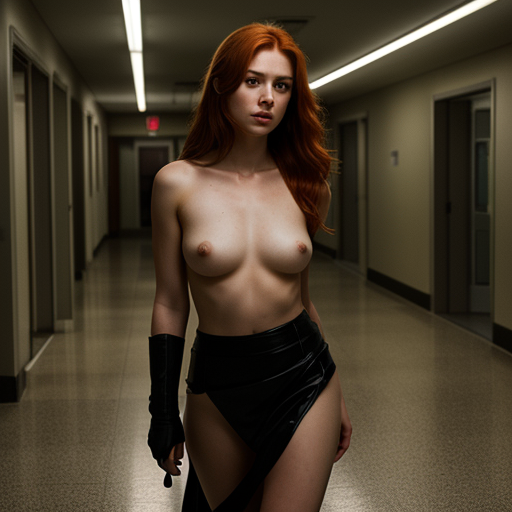

In [ ]:
#!nvidia-smi - если раскомментировать, то будет показывать информацию о видеокарте
import torch
import os
from google.colab import files
from diffusers import StableDiffusionPipeline
from diffusers import (
    DDPMScheduler,
    DDIMScheduler,
    PNDMScheduler,
    LMSDiscreteScheduler,
    EulerAncestralDiscreteScheduler,
    EulerDiscreteScheduler,
    DPMSolverMultistepScheduler,
)
from PIL import Image
import numpy as np

current_checkpoint = "GraydientPlatformAPI/picx-real"
current_device = "cuda" # <-- значение "cuda" будет использовать видеокарту для генерации. Значение "cpu" будет использовать процессор
use_gdrive = False

# Список планировщиков
ddpm = DDPMScheduler.from_pretrained(current_checkpoint, subfolder="scheduler")
ddim = DDIMScheduler.from_pretrained(current_checkpoint, subfolder="scheduler")
pndm = PNDMScheduler.from_pretrained(current_checkpoint, subfolder="scheduler")
lms = LMSDiscreteScheduler.from_pretrained(current_checkpoint, subfolder="scheduler")
euler_anc = EulerAncestralDiscreteScheduler.from_pretrained(current_checkpoint, subfolder="scheduler")
euler = EulerDiscreteScheduler.from_pretrained(current_checkpoint, subfolder="scheduler")
dpm = DPMSolverMultistepScheduler.from_pretrained(current_checkpoint, subfolder="scheduler")

# Настройка пайплайна
pipe = StableDiffusionPipeline.from_pretrained(current_checkpoint, torch_dtype=torch.float16)
pipe = pipe.to(current_device)
pipe.safety_checker = None # Откючение NFSW (18+)
pipe.scheduler = euler.from_config(pipe.scheduler.config) # <-- Здесь выбираем планировщик, список в переменных выше

# Создаём папку в Google Drive, если её нет
if not os.path.exists("/content/gdrive/MyDrive/SDOutput") and use_gdrive:
  os.makedirs("/content/gdrive/MyDrive/SDOutput", exist_ok=True)
  print("Создана папка для автосохранения изображений в Google Drive")

# Здесь указываем переменные для пайплайна Stable Diffusion
# Дефолтный промпт для лучшего качества: (8k, ultra realistic, highly detailed, cinematic lighting)
prompt = "naked woman armed with a revolver, 25 years old, ginger hair, black skirt, shocked expression, empty hospital hallway, eerie atmosphere, 8k, ultra realistic, highly detailed, cinematic lighting"
negs=    "ugly face, canvas frame, cartoon, 3d, disfigured, bad art, deformed, extra limbs, close up, b&w, wierd colors, blurry, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, ugly, blurry, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, out of frame, ugly, extra limbs, bad anatomy, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, mutated hands, fused fingers, too many fingers, long neck, Photoshop, video game, ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, mutation, mutated, extra limbs, extra legs, extra arms, disfigured, deformed, cross-eye, body out of frame, blurry, bad art, bad anatomy, 3d render"

width=      512
height=     512
steps=      25
gscale=     7.5
randomness= True  # <-- если значение True, то генерация будет происходить с рандомным сидом, если False, то с сидом указанным в переменной seed
seed=       0
############################################################

# Генерация картинки

print("###############")
print("Текущая модель Stable Diffusion: " + current_checkpoint)
print("Промпт: " + prompt)
print("Негативный промпт: " + negs)
print("Разрешение: " + str(width) + "x" + str(height))

if not randomness:
  generator = torch.Generator(current_device).manual_seed(seed)
  print("Seed этого изображения: " + str(seed) + "\n###############")
elif randomness:
  current_seed = torch.Generator(current_device).seed()
  generator = torch.Generator(current_device).manual_seed(current_seed)
  print("Seed этого изображения: " + str(current_seed) + "\n###############")

image = pipe(prompt, height=height, width=width, num_inference_steps=steps, guidance_scale=gscale, negative_prompt=negs, generator=generator, num_images_per_prompt=2).images[0]

# Вывод и сохрарнение результата

if use_gdrive:
  file_name = prompt + " " + str(current_seed) + ".png"
  temp_path = "/tmp/image.png"
  image_pil = Image.fromarray(np.uint8(image))
  image_pil.save(temp_path, "PNG")
  new_file_name = "/content/gdrive/MyDrive/SDOutput/" + file_name
  !cp $temp_path /content/gdrive/MyDrive/SDOutput
  os.rename("/content/gdrive/MyDrive/SDOutput/image.png", new_file_name)
  print("Сохранено: /content/gdrive/MyDrive/SDOutput/" + file_name)

image